In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

defaultFontSize = 17

plt.rc('font', size=defaultFontSize) #controls default text size
plt.rc('axes', titlesize=defaultFontSize) #fontsize of the title
plt.rc('axes', labelsize=defaultFontSize+2) #fontsize of the x and y labels
plt.rc('xtick', labelsize=defaultFontSize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=defaultFontSize) #fontsize of the y tick labels
plt.rc('legend', fontsize=defaultFontSize) #fontsize of the legend

cmapbins = '#250a43' #color for histogram bins

charginos = pd.read_csv('data/charginos.csv')
charginos2 = pd.read_pickle('data/charginosDf.pkl')

hitsDf = pd.read_pickle('data/hitsDf.pkl')
charginos2['hits'] = hitsDf

trackedCharginos = charginos.copy()

trackedCharginos = trackedCharginos[['mass', 'ctau', 'ctau*boost', 'validHits', 'event', 'run', 'luminosityBlock', 'pt', 'eta', 'phi', 'trackPt', 'trackEta', 'trackPhi', 'beta', 'gamma']]

trackedCharginos['hits'] = hitsDf

trackedCharginos = trackedCharginos[trackedCharginos['validHits'] != 0]

#trackedCharginos.sort_values('ctau', inplace=True)

trackedCharginos2 = charginos2[charginos2['foundTrack'] == 1.0]
charginos2.head()

,mass,charge,p,pdgId,status,pt,eta,phi,decayLength,ctau,...,dR,trackPhi,trackEta,validHits,missingInnerHits,missingTrackHits,missingOuterHits,validLayers,layersNoMeasurements,hits
1,700.048,1,1189.790,1000024,62.0,109.149,3.079860,2.742540,167.75800,98.7050,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,hit subdetector trackerPart layerDi...
6,700.048,-1,134.310,-1000024,62.0,134.275,-0.022846,-0.234468,19.89770,103.7100,...,0.001520,-0.235915,-0.022381,4.0,1.0,0.0,2.0,4.0,9.0,hit subdetector trackerPart layer...
8,700.048,1,717.605,1000024,62.0,306.623,1.494320,2.455400,24.18880,23.5970,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,hit subdetector trackerPart layer...
27,700.048,1,530.192,1000024,62.0,526.916,-0.111461,1.445640,189.75800,250.5500,...,0.000252,1.445530,-0.111233,18.0,1.0,0.0,2.0,14.0,0.0,hit subdetector trackerPart layerDi...
29,700.048,-1,480.965,-1000024,62.0,283.369,-1.121270,0.710112,3.86992,5.6327,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,hit subdetector trackerPart layer...


In [43]:
charginos2.loc[1,'hits']

,hit,subdetector,trackerPart,layerDiskWheel
hit1,1.0,1.0,1.0,1.0
hit2.0,2.0,1.0,1.0,2.0
hit3.0,3.0,1.0,1.0,3.0
hit4.0,4.0,1.0,1.0,4.0


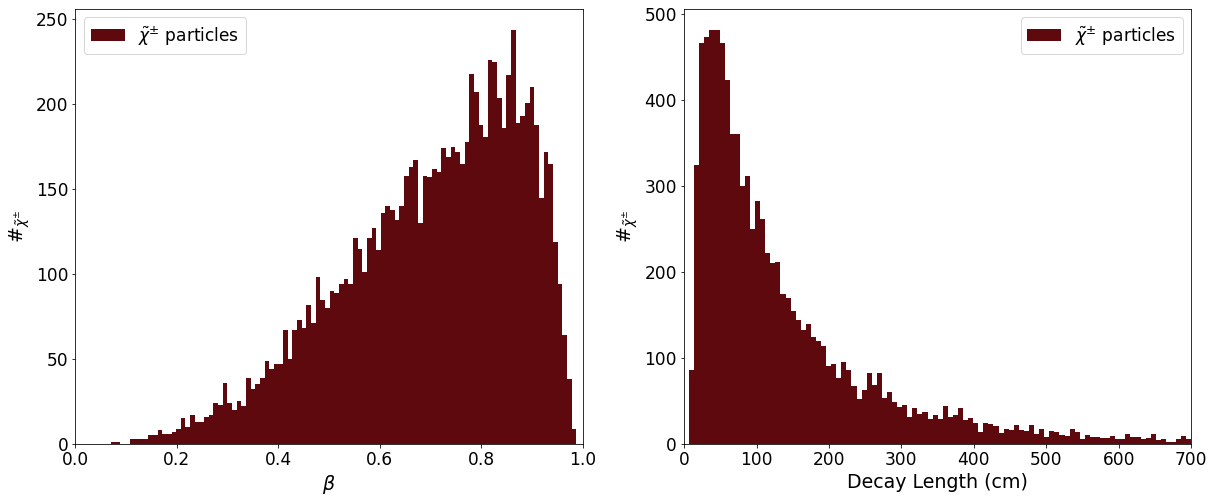

In [3]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(121)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

ax.set_xlim(0,1)
_,_,im = ax.hist(trackedCharginos['beta'], bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles')
ax.legend()

ax = fig.add_subplot(122)
ax.set_xlabel('Decay Length (cm)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

ax.set_xlim(0,700)
_,_,im = ax.hist(trackedCharginos['ctau'], bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles', range=[0,700])
ax.legend()

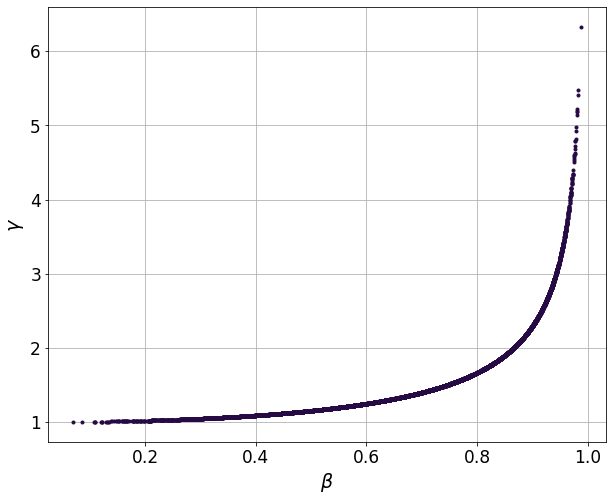

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\gamma$')

#_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['gamma'], bins=50,range=[[0,1],[1,4]], cmap='inferno')
#fig.colorbar(im)

ax.plot(trackedCharginos['beta'], trackedCharginos['gamma'], marker='.', linewidth=0, color=cmapbins)
plt.grid()

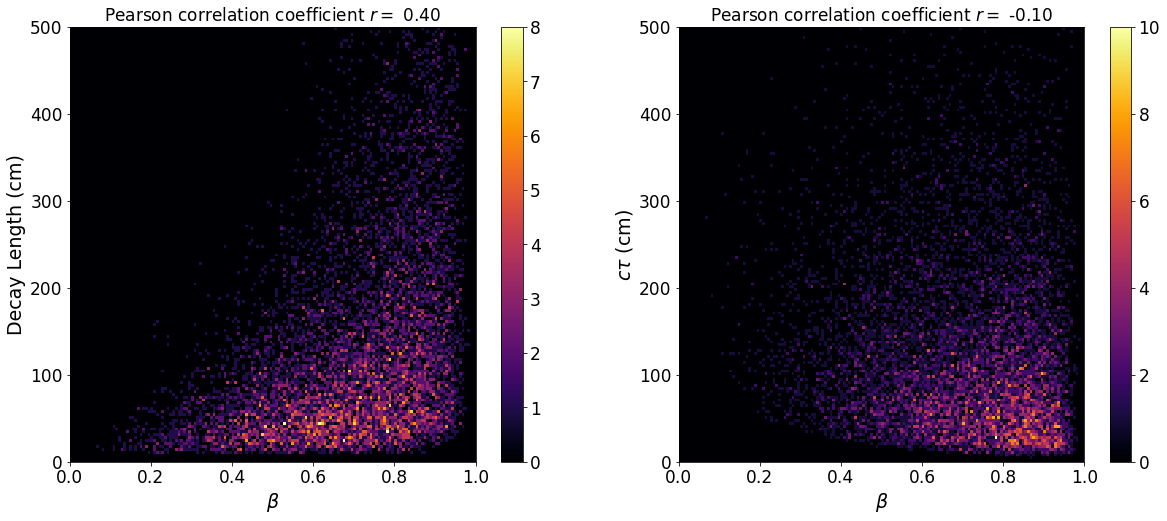

In [5]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Decay Length (cm)')

ctauCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.4s' % (ctauCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$c\tau$ (cm)')

ctauBoostCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau*boost'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.5s' % (ctauBoostCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau*boost'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

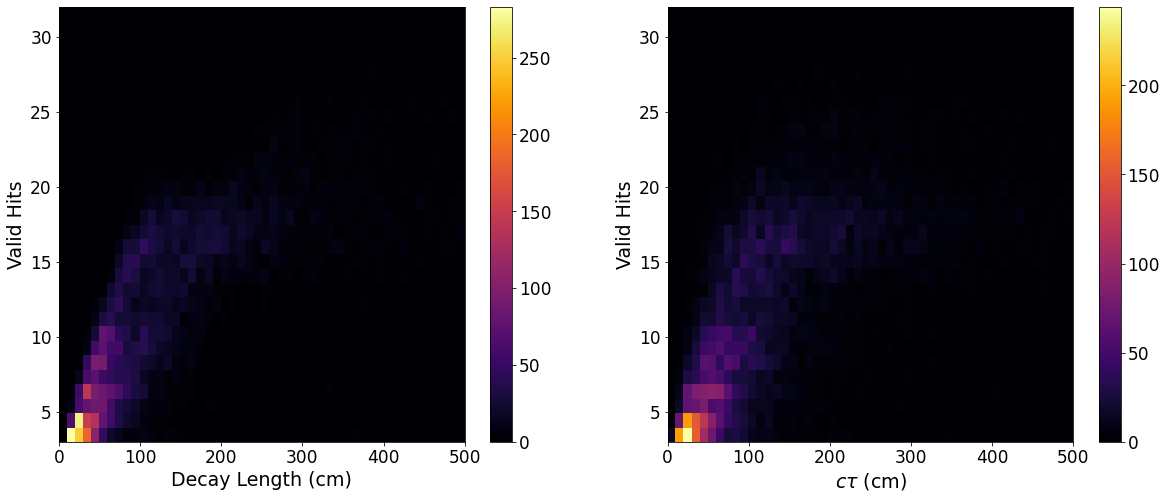

In [6]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'Decay Length (cm)')
ax.set_ylabel('Valid Hits')

_,_,_,im = ax.hist2d(trackedCharginos['ctau'], trackedCharginos['validHits'], bins=(50,30), range=[[0,500],[3,32]], cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Valid Hits')

_,_,_,im = ax.hist2d(trackedCharginos['ctau*boost'], trackedCharginos['validHits'], bins=(50,30), range=[[0,500],[3,32]], cmap='inferno')
fig.colorbar(im)

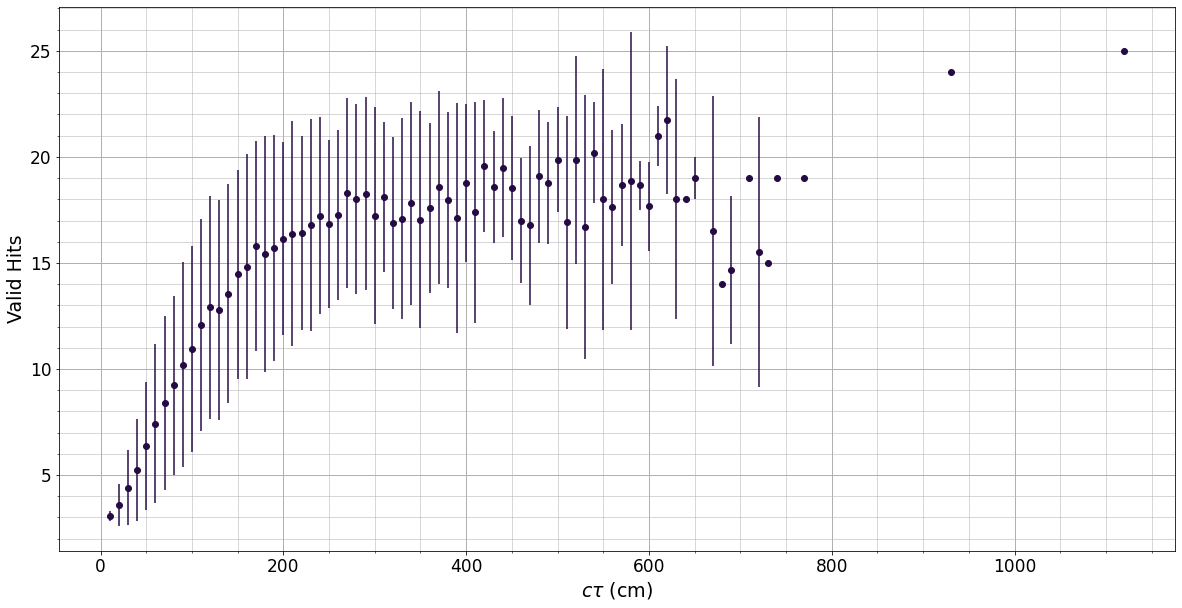

In [7]:
def createLabel10s(cTau):
    return (10 * np.ceil(cTau / 10))

#trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['ctau'])

#cTau10cmMean = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()
#cTau10cmStd = trackedCharginos.groupby('cTauLabel10s')['validHits'].std()

#fig = plt.figure(figsize=(20,10))
#ax = fig.add_subplot(111)

#ax.set_xlabel('Decay Length (cm)')
#ax.set_ylabel('Valid Hits')

#ax.errorbar(cTau10cmMean.index, cTau10cmMean, yerr=cTau10cmStd, color=cmapbins, marker='o', elinewidth=1.5, linewidth=0)

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['ctau*boost'])

cTau10cmMean = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()
cTau10cmStd = trackedCharginos.groupby('cTauLabel10s')['validHits'].std()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Valid Hits')

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,1200,25), minor=True)
ax.set_yticks(np.linspace(0,30,31), minor=True)
ax.set_xticks(np.linspace(0,1200,7))
ax.set_yticks(np.linspace(0,30,7))

ax.errorbar(cTau10cmMean.index, cTau10cmMean, yerr=cTau10cmStd, color=cmapbins, marker='o', elinewidth=1.5, linewidth=0)
plt.grid(which='both', axis='both')

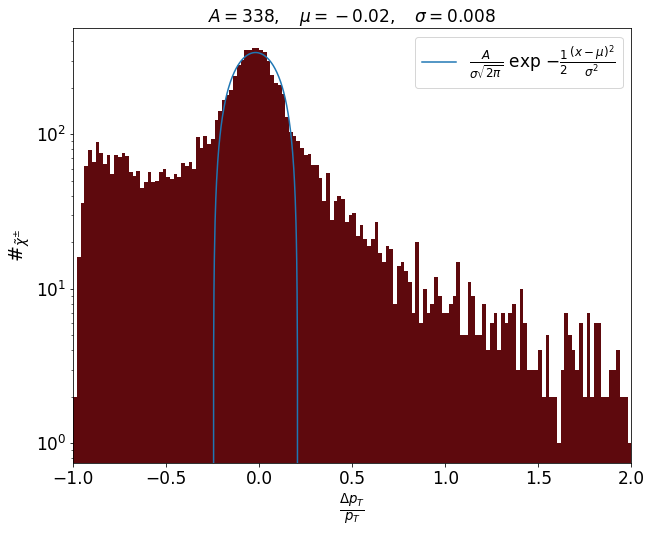

In [8]:
# Adding pt resolution to the dataframe
trackedCharginos['ptResolution'] = (trackedCharginos['trackPt'] - trackedCharginos['pt']) / trackedCharginos['pt']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')
ax.set_yscale('log')
ax.set_xlim(-1,2)

n,bins,im = ax.hist(trackedCharginos['ptResolution'],range=(-1,2) , bins=150, color='#5e090d')

binInterval = bins[1] - bins[0]
newBins = bins[:-1]
newBins = newBins + binInterval/2

def fitInterval(xmin, xmax, xarray, yarray):
    finalx = []
    finaly = []
    for i in range(len(xarray)):
        if (xarray[i] > xmin and xarray[i] < xmax):
            finalx.append(xarray[i])
            finaly.append(yarray[i])
    return finalx, finaly

xfit, yfit = fitInterval(-0.2, 0.2, newBins, n)
xfit = np.array(xfit)
yfit = np.array(yfit)
fitfunc = lambda p, x : p[0] * x * x + p[1] * x + p[2]
errfunc = lambda p, x, y : fitfunc(p, x) - y
init = [-1, 1, 300]
out = leastsq(errfunc, init, args=(xfit, yfit))
fittedCurve = out[0]

curveArray = np.linspace(-.5, .5, 500)
plt.plot(curveArray, fitfunc(fittedCurve, curveArray), label = r'$\frac{A}{\sigma \sqrt{2\pi}}$ exp $-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}$')
plt.legend()

peak = fitfunc(fittedCurve, (-fittedCurve[1])/(2 * fittedCurve[0]))

plt.title(r'$A = %.3s, \quad \mu = %.5s, \quad \sigma = %.5s$' % (peak, (-fittedCurve[1])/(2 * fittedCurve[0]), np.sqrt(-1 / (2 * fittedCurve[0]))))

positiveDeltaPt = trackedCharginos[trackedCharginos['ptResolution']>0]
negativeDeltaPt = trackedCharginos[trackedCharginos['ptResolution']<0]

#print(r'Positive resolution Charginos: %s  (%.4s %%) ; Negative resolution Charginos: %s (%.4s %%)' % (positiveDeltaPt.shape[0], 100* positiveDeltaPt.shape[0] / trackedCharginos.shape[0], negativeDeltaPt.shape[0], 100* negativeDeltaPt.shape[0] / trackedCharginos.shape[0]))

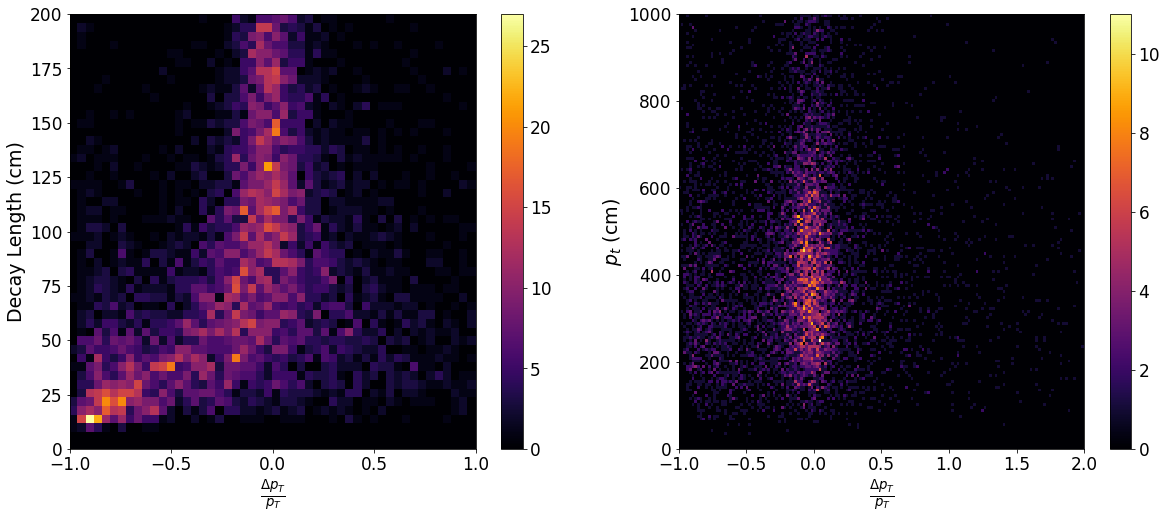

In [9]:
fig = plt.figure(figsize=(20,8))
xrange = 1

ax = fig.add_subplot(121)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel('Decay Length (cm)')

dfg100 = trackedCharginos[trackedCharginos['ctau'] < 200]

_,_,_,im = ax.hist2d(dfg100['ptResolution'],dfg100['ctau'],range=((-1,xrange),(0,200)) , bins=50, cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$p_{t}$ (cm)')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['pt'],range=((-1,2),(0,1000)) , bins=150, cmap='inferno')
fig.colorbar(im)

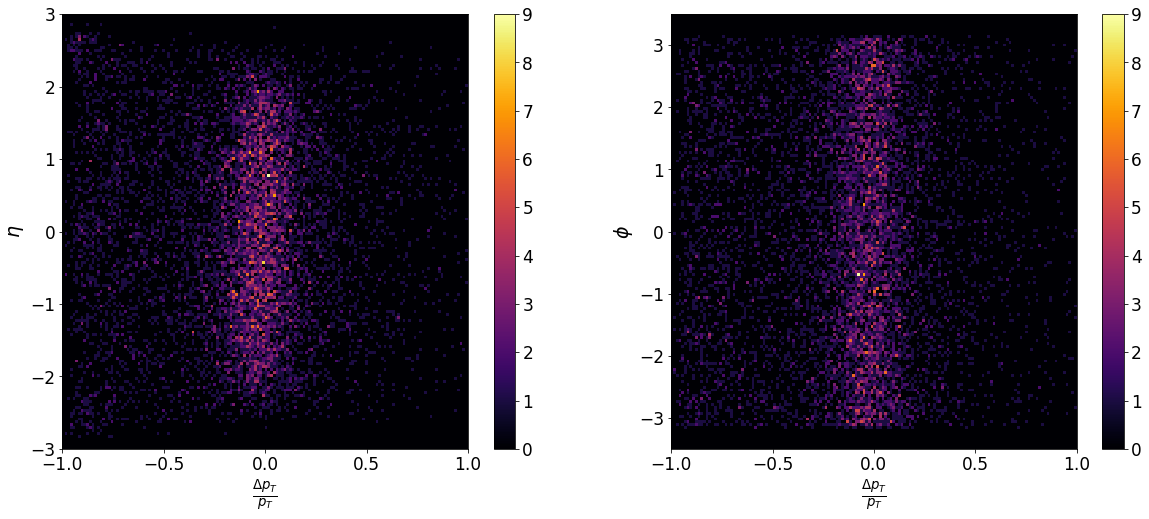

In [10]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\eta$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['eta'],range=((-1,1),(-3,3)) , bins=150, cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\phi$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['phi'],range=((-1,1),(-3.5,3.5)) , bins=150, cmap='inferno')
fig.colorbar(im)

plt.savefig('plots/resolutionPhiHist2d.pdf')

In [11]:
### Reconstruction Efficiency plots

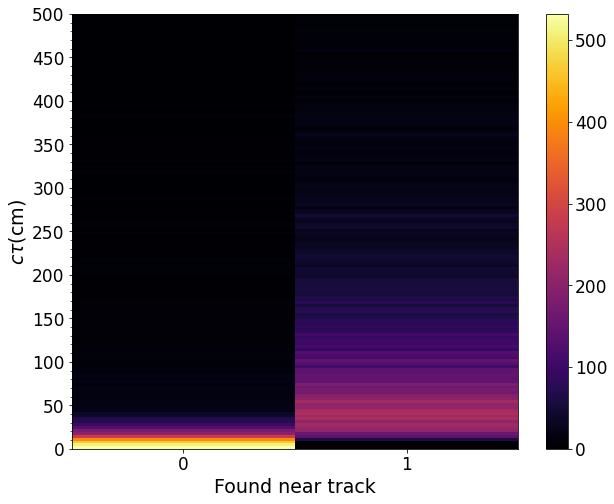

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel('Found near track')
ax.set_ylabel(r'$c\tau$(cm)')

xlimit = 1.5

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.set_xticks([0,1])
ax.set_yticks(np.linspace(0,500,11))
ax.set_yticks(np.linspace(0,500,51), minor=True)

_,_,_,im = ax.hist2d(charginos['foundNearTrack'],charginos['ctau'],range=((-.5,1.5),(0,500)) , bins=(2,150), cmap='inferno')
fig.colorbar(im)

In [13]:
errTable = pd.read_table('data/EfficiencyAndErrors.txt')

TOTAL = 9
PASSED = 4

errTable[(errTable['# Total'] == TOTAL) & (errTable['Passed'] == PASSED)]['Upper']

48    0.607236
Name: Upper, dtype: float64

In [14]:
def variableLabels(variable, interval):
    return (interval * np.ceil(variable / interval))

In [113]:
def variableEfficiency(particles, trackedParticles, variable, interval):
    tmpParticles = particles.copy()
    tmpParticles = tmpParticles[(tmpParticles['eta'] < 2.0) & (tmpParticles['eta'] > -2.0)] # Select only charginos able to be detected
    tmpTrackedParticles = trackedParticles.copy()
    tmpTrackedParticles = tmpTrackedParticles[(tmpTrackedParticles['eta'] < 2.0) & (tmpTrackedParticles['eta'] > -2.0)] # Select only charginos able to be detected
    
    tmpParticles['groupByLabel'] = variableLabels(tmpParticles[variable], interval)
    tmpTrackedParticles['groupByLabel'] = variableLabels(tmpTrackedParticles[variable], interval)
    
    particlesNumber = tmpParticles.groupby('groupByLabel')[variable].count()
    trackedParticlesNumber = tmpTrackedParticles.groupby('groupByLabel')[variable].count()
    
    recEfficiency = pd.DataFrame(particlesNumber)
    recEfficiency['trackedParticlesNumber'] = trackedParticlesNumber
    
    recEfficiency['trackedParticlesNumber'] = recEfficiency['trackedParticlesNumber'].replace(np.nan, 0)
    recEfficiency['efficiency'] = recEfficiency['trackedParticlesNumber'] / recEfficiency[variable]
    
    lowerCol = []
    upperCol = []
    
    for i in range(recEfficiency.shape[0]):
        totalEvents = recEfficiency.iloc[i,0]
        passedEvents = recEfficiency.iloc[i,1]
        lowerError = errTable[(errTable['# Total'] == totalEvents) & (errTable['Passed'] == passedEvents)]['Lower']
        upperError = errTable[(errTable['# Total'] == totalEvents) & (errTable['Passed'] == passedEvents)]['Upper']
        lowerCol.append(lowerError.values)
        upperCol.append(upperError.values)
    
    for i in range(len(lowerCol)):
        tmpLList = list(lowerCol[i])
        tmpUList = list(upperCol[i])
        
        if len(tmpLList) == 0:
            lowerCol[i] = recEfficiency.iloc[i,2]
        else:
            lowerCol[i] = tmpLList[0]
        if len(tmpUList) == 0:
            upperCol[i] = recEfficiency.iloc[i,2]
        else:
            upperCol[i] = tmpUList[0]
            
    recEfficiency['Lower'] = lowerCol
    recEfficiency['Upper'] = upperCol
    recEfficiency['Lower'] = recEfficiency['efficiency'] - lowerCol
    recEfficiency['Upper'] = upperCol - recEfficiency['efficiency']
    
    lowerCol = np.array(recEfficiency['Lower'])
    upperCol = np.array(recEfficiency['Upper'])
    
    return recEfficiency, lowerCol, upperCol

recEfficiency,lowerCol,upperCol = variableEfficiency(charginos, trackedCharginos, 'ctau', 40)

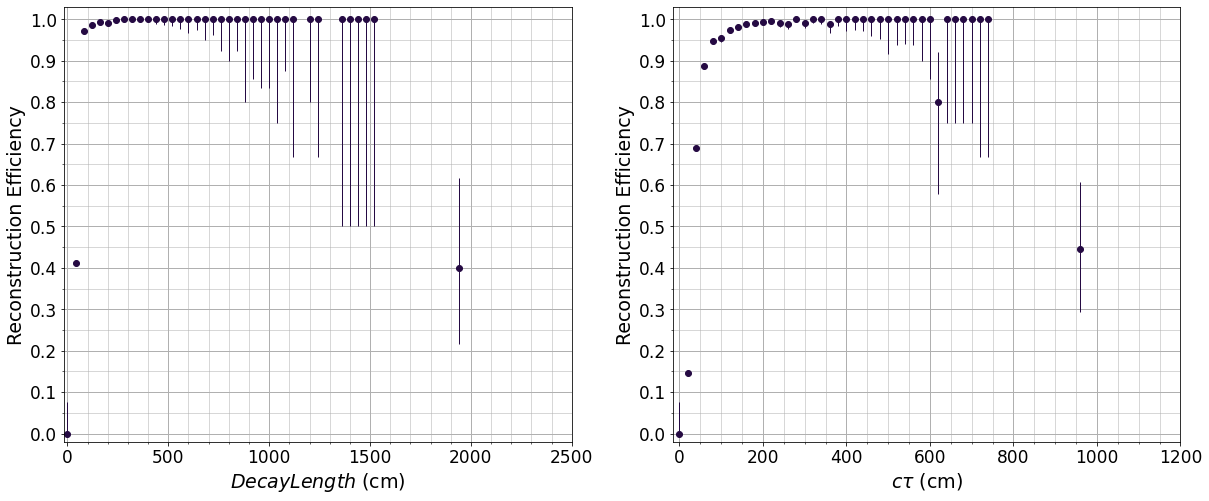

In [102]:
variableInterval = 40
variableIntervalBoost = 20

recEfficiency, lowerCol, upperCol = variableEfficiency(charginos, trackedCharginos, 'ctau', variableInterval)

recEfficiency = recEfficiency[recEfficiency.index < 1530]
highTau = pd.DataFrame(data=[[5, 2, 0.4]], index=[1940.0], columns=['ctau*boost', 'trackedParticlesNumber', 'efficiency'])
recEfficiency = recEfficiency.append(highTau)
lowerCol = lowerCol[:36]
upperCol = upperCol[:36]
lowerCol = np.append(lowerCol, (2/5 - 0.21597))
upperCol = np.append(upperCol, (0.617364 - 2/5))

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$Decay Length$ (cm)')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,2500)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,2500,26), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,2500,6))
ax.set_yticks(np.linspace(0,1,11))

ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol],color=cmapbins, marker='o', elinewidth=1,linewidth=0)
plt.grid(which='both', axis='both')

recEfficiency, lowerCol, upperCol = variableEfficiency(charginos, trackedCharginos, 'ctau*boost', variableIntervalBoost)

recEfficiency = recEfficiency[recEfficiency.index < 800]
highTau = pd.DataFrame(data=[[9, 4, 4/9]], index=[960.0], columns=['ctau*boost', 'trackedParticlesNumber', 'efficiency'])
recEfficiency = recEfficiency.append(highTau)
lowerCol = lowerCol[:38]
upperCol = upperCol[:38]
lowerCol = np.append(lowerCol, (4/9 - 0.292764))
upperCol = np.append(upperCol, (0.607236 - 4/9))

ax = fig.add_subplot(122)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,1200)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,1200,25), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,1200,7))
ax.set_yticks(np.linspace(0,1,11))

ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol[:40], upperCol[:40]],color=cmapbins, marker='o', elinewidth=1,linewidth=0)
plt.grid(which='both', axis='both')

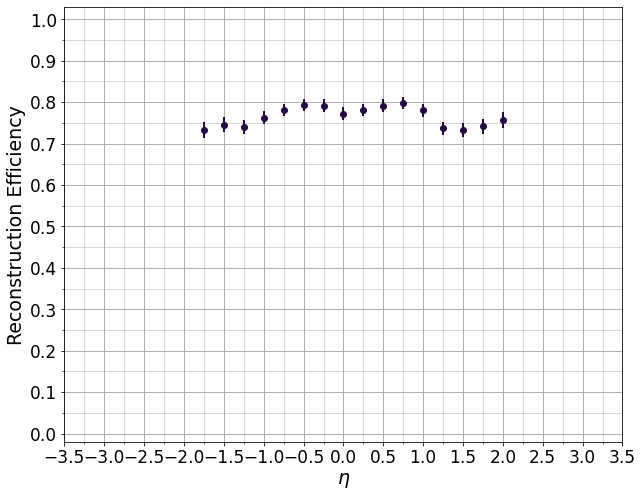

In [103]:
recEfficiency, lowerCol, upperCol = variableEfficiency(charginos, trackedCharginos, 'eta', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol],color=cmapbins, marker='o', elinewidth=2,linewidth=0)
plt.grid(which='both', axis='both')

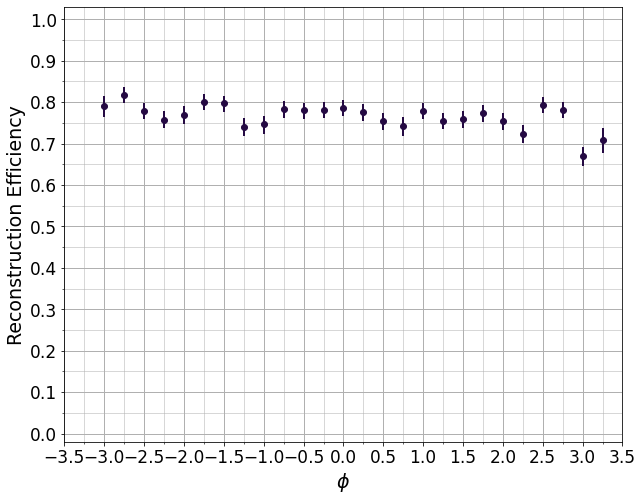

In [104]:
recEfficiency, lowerCol, upperCol = variableEfficiency(charginos, trackedCharginos, 'phi', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol],color=cmapbins, marker='o', elinewidth=2,linewidth=0)
plt.grid(which='both', axis='both')

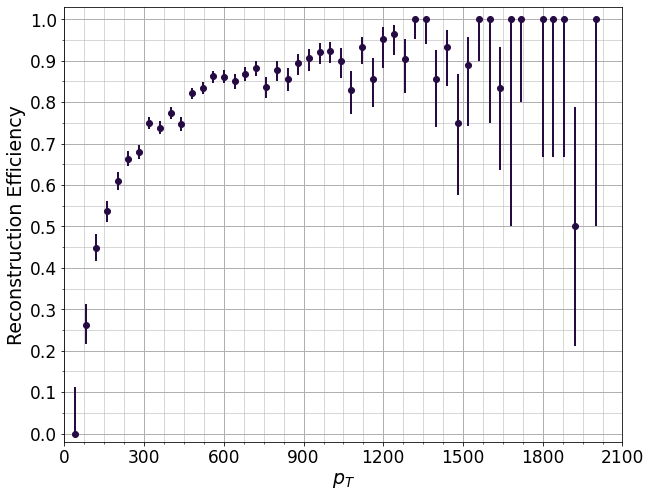

In [106]:
recEfficiency, lowerCol, upperCol = variableEfficiency(charginos, trackedCharginos, 'pt', 40)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 2100

ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(0,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,xlimit,8))
ax.set_yticks(np.linspace(0,1,11))

ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol],color=cmapbins, marker='o', elinewidth=2,linewidth=0)
plt.grid(which='both', axis='both')

In [107]:
def PtCtauCut(ptThreshold, ctauThreshold):
    lowPtTrackedCharginos = trackedCharginos[trackedCharginos['pt'] < ptThreshold]
    lowPtTrackedCharginos = lowPtTrackedCharginos[lowPtTrackedCharginos['ctau*boost'] > ctauThreshold]
    lowPtCharginos = charginos[charginos['pt'] < ptThreshold]
    lowPtCharginos = lowPtCharginos[lowPtCharginos['ctau*boost'] > ctauThreshold]
    
    return lowPtTrackedCharginos, lowPtCharginos

def plotPtCtauCut(xlimit, ctauThreshold, plotRow, plotColumn, title, colorline, ylabel):
    lowPtTrackedCharginos, lowPtCharginos = PtCtauCut(xlimit, ctauThreshold)

    recEfficiency, lowerCol, upperCol = variableEfficiency(lowPtCharginos, lowPtTrackedCharginos, 'pt', 10)

    ax.set_title(title)
    ax.set_xlabel(r'$p_{T}$')
    ax.set_ylabel('Reconstruction Efficiency') if ylabel else 0

    ax.set_ylim(-0.02, 1.03)
    ax.set_xlim(0,xlimit)

    ax.tick_params(which='major',grid_linewidth=1)
    ax.tick_params(which='minor',grid_linewidth=0.5)
    ax.set_xticks(np.linspace(0,xlimit,31), minor=True)
    ax.set_yticks(np.linspace(0,1,21), minor=True)
    ax.set_xticks(np.linspace(0,xlimit,7))
    ax.set_yticks(np.linspace(0,1,11))

    ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol], color=colorline, marker='o', elinewidth=2, linewidth=0)
    plt.grid(which='both', axis='both')
    
    return 0

0

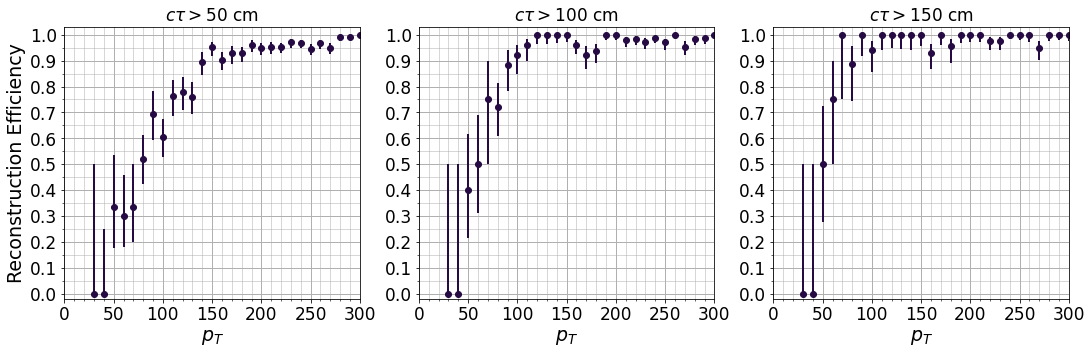

In [108]:
fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(131)
plotPtCtauCut(300, 50, 1, 1, r'$c\tau > 50$ cm', cmapbins, 1)

ax = fig.add_subplot(132)
plotPtCtauCut(300, 100, 1, 1, r'$c\tau > 100$ cm', cmapbins, 0)

ax = fig.add_subplot(133)
plotPtCtauCut(300, 150, 1, 1, r'$c\tau > 150$ cm', cmapbins, 0)

#ax = fig.add_subplot(224)
#plotPtCtauCut(300, 200, 1, 1)

In [109]:
def plotPtCtau(xlimit, ctauThreshold, plotRow, plotColumn, title, colorline, ylabel):
    lowPtTrackedCharginos, lowPtCharginos = PtCtauCut(xlimit, ctauThreshold)

    recEfficiency,lowerCol,upperCol = variableEfficiency(lowPtCharginos, lowPtTrackedCharginos, 'pt', 10)

    ax.set_title(title)
    ax.set_xlabel(r'$p_{T}$')
    ax.set_ylabel('Reconstruction Efficiency') if ylabel else 0

    ax.set_ylim(-0.02, 1.03)
    ax.set_xlim(0,xlimit)

    ax.tick_params(which='major',grid_linewidth=1)
    ax.tick_params(which='minor',grid_linewidth=0.5)
    ax.set_xticks(np.linspace(0,xlimit,31), minor=True)
    ax.set_yticks(np.linspace(0,1,21), minor=True)
    ax.set_xticks(np.linspace(0,xlimit,7))
    ax.set_yticks(np.linspace(0,1,11))

    ax.errorbar(recEfficiency.index, recEfficiency['efficiency'], yerr=[lowerCol, upperCol],color=colorline, marker='o', elinewidth=2,linewidth=0, label = title)
    plt.grid(which='both', axis='both')
    plt.legend()
    
    return 0

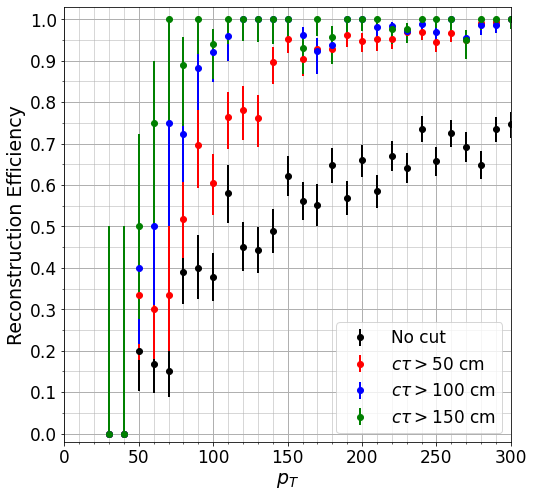

In [112]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
plotPtCtau(300, 0, 1, 1, 'No cut', 'black', 0)
plotPtCtau(300, 50, 1, 1, r'$c\tau > 50$ cm', 'red', 0)
plotPtCtau(300, 100, 1, 1, r'$c\tau > 100$ cm', 'blue', 0)
plotPtCtau(300, 150, 1, 1, r'$c\tau > 150$ cm', 'green', 1)
plt.title('')
plt.grid(which='both', axis='both')

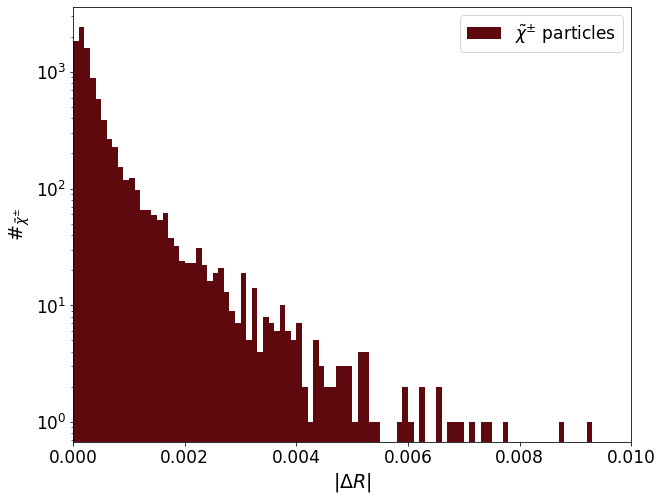

In [24]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
ax.set_xlabel(r'|$\Delta R$|')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

xlimit = 0.01
ax.set_xlim(0,xlimit)
ax.set_yscale('log')
_,_,im = ax.hist(trackedCharginos2['dR'], range=(0,xlimit),bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles')
ax.legend()

In [30]:
charginos2.columns

Index(['mass', 'charge', 'p', 'pdgId', 'status', 'pt', 'eta', 'phi', 'beta',
       'gamma', 'eventId', 'eventRun', 'eventLumiBlock', 'foundTrack',
       'trackCharge', 'trackPt', 'dR', 'trackPhi', 'trackEta', 'validHits',
       'missingInnerHits', 'missingTrackHits', 'missingOuterHits',
       'validLayers', 'layersNoMeasurements'],
      dtype='object')

In [55]:
lowEffEvents = charginos2[(charginos2['foundTrack'] == 0) & (charginos2['pt'] > 50) & (charginos2['ctau'] > 150)]

print(lowEffEvents.shape)
lowEffEvents[['pt', 'eta','phi','ctau', 'eventRun', 'eventLumiBlock', 'eventId']].head(10)

(163, 28)


,pt,eta,phi,ctau,eventRun,eventLumiBlock,eventId
645,76.4343,-3.86790,-2.502050,414.34,1.0,1.0,56.0
647,75.2275,-3.43922,0.963362,223.06,1.0,1.0,56.0
988,214.5430,2.89227,-0.147906,297.34,1.0,1.0,84.0
1665,289.8300,-2.91457,2.258930,190.46,1.0,1.0,138.0
1808,147.6140,2.59415,2.338690,249.38,1.0,1.0,145.0
1835,62.7365,3.89827,0.990986,319.10,1.0,1.0,157.0
2142,188.5270,-2.96303,-0.247007,165.43,1.0,1.0,183.0
2169,92.5525,3.88506,-1.239460,318.29,1.0,1.0,178.0
2481,71.0131,3.10362,-1.129960,168.44,1.0,1.0,201.0
2862,72.0895,-3.56285,2.005830,372.85,1.0,1.0,224.0


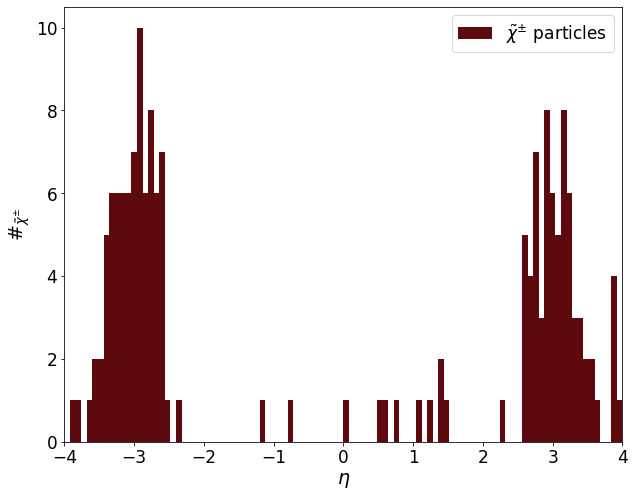

In [54]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

xlimit = 4
ax.set_xlim(-xlimit,xlimit)
_,_,im = ax.hist(lowEffEvents['eta'], range=(-xlimit,xlimit),bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles')
ax.legend()

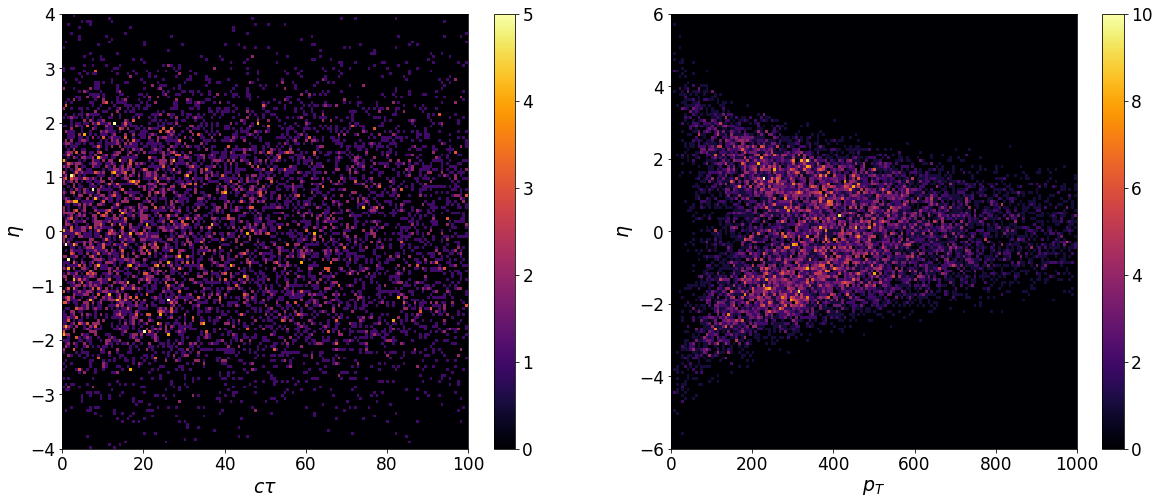

In [83]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$c\tau$')
ax.set_ylabel(r'$\eta$')

_,_,_,im = ax.hist2d(charginos2['ctau'], charginos2['eta'],range=((0,100),(-4,4)) , bins=150, cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel(r'$\eta$')

_,_,_,im = ax.hist2d(charginos2['pt'], charginos2['eta'],range=((0,1000),(-6,6)) , bins=150, cmap='inferno')
fig.colorbar(im)

In [26]:
testDf = trackedCharginos[['ctau', 'validHits', 'hits']]

testDf.head(15)

,ctau,validHits,hits
1,19.8977,4,hit subdetector trackerPart layerDisk...
2,313.3090,24,hit subdetector trackerPart layerDisk...
3,366.3240,25,hit subdetector trackerPart layerDis...
6,368.9790,3,hit subdetector trackerPart layerDis...
7,189.7580,18,hit subdetector trackerPart layerDis...
8,24.9152,3,hit subdetector trackerPart layerDis...
9,167.1490,14,hit subdetector trackerPart layerDisk...
10,126.3570,10,hit subdetector trackerPart layerDisk...
11,83.1632,17,hit subdetector trackerPart layerDis...
12,65.8442,8,hit subdetector trackerPart layerDis...


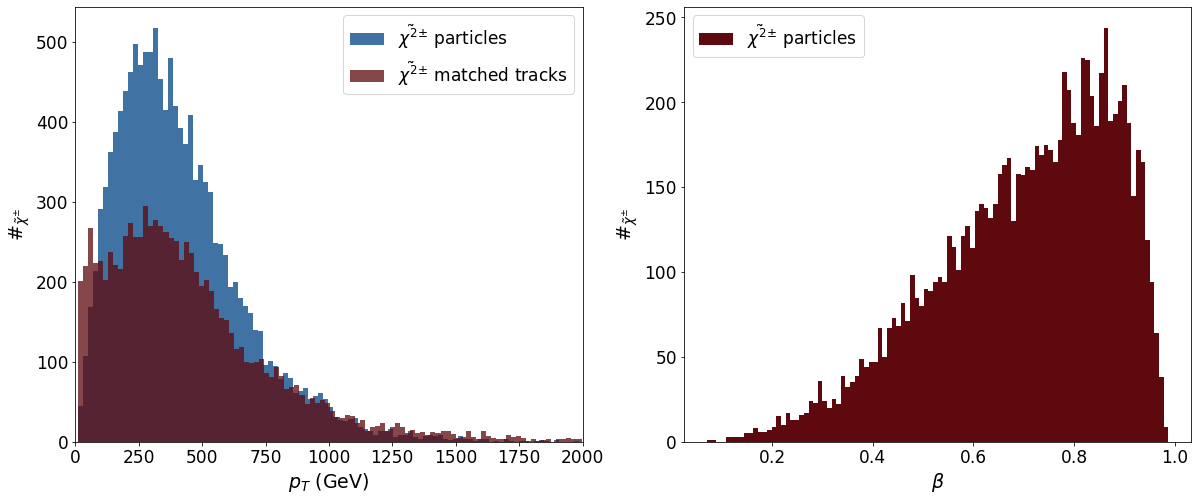

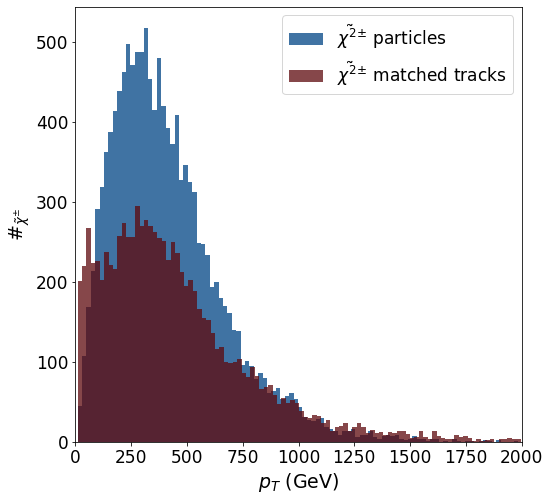

In [27]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$p_{T}$ (GeV)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

selTrackedCharginos = trackedCharginos[trackedCharginos['trackPt'] < 2000]
_,_,im = ax.hist(charginos['pt'], bins=100, color='#004485', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ particles')
_,_,im = ax.hist(selTrackedCharginos['trackPt'], bins=100, color='#5e090d', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ matched tracks')
ax.legend()
ax.set_xlim((0,2000))

ax = fig.add_subplot(122)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

_,_,im = ax.hist(trackedCharginos['beta'], bins=100, color='#5e090d', label=r'$\tilde{\chi^2}^{\pm}$ particles')
ax.legend()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$p_{T}$ (GeV)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

selTrackedCharginos = trackedCharginos[trackedCharginos['trackPt'] < 2000]
_,_,im = ax.hist(charginos['pt'], bins=100, color='#004485', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ particles')
_,_,im = ax.hist(selTrackedCharginos['trackPt'], bins=100, color='#5e090d', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ matched tracks')
ax.legend()
ax.set_xlim((0,2000))

plt.savefig('plots/charginosMatchedCharginosHistogram.pdf')